In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Remove rows with missing important values
df = df.dropna(subset=['Quantity', 'UnitPrice', 'CustomerID'])

# Calculate total purchase value
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract useful date features
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

# Create target variable (1 = High Purchase, 0 = Low Purchase)
threshold = df['TotalAmount'].median()
df['HighPurchase'] = np.where(df['TotalAmount'] >= threshold, 1, 0)

# Select relevant numeric features
data = df[['Quantity', 'UnitPrice', 'Month', 'Day', 'Hour', 'HighPurchase']].dropna()


In [4]:
X = data[['Quantity', 'UnitPrice', 'Month', 'Day', 'Hour']]
y = data['HighPurchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

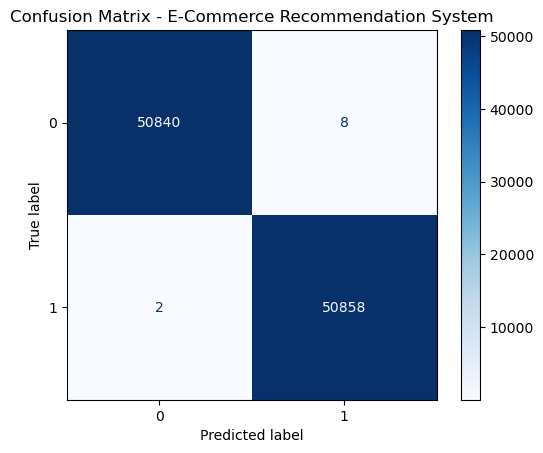

In [6]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - E-Commerce Recommendation System")
plt.show()


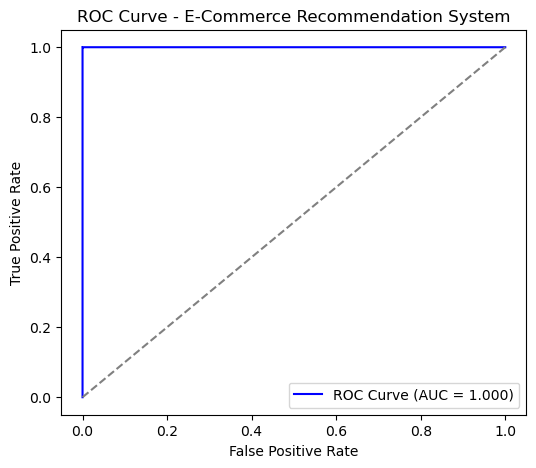

In [7]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - E-Commerce Recommendation System')
plt.legend()
plt.show()


In [ ]:
#ASSIGNMENT WORK:
#Evaluate model with Precision, Recall, F1 score.

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Model Evaluation Metrics")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

# Optional detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


📊 Model Evaluation Metrics
Precision: 1.000
Recall:    1.000
F1 Score:  1.000

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50848
           1       1.00      1.00      1.00     50860

    accuracy                           1.00    101708
   macro avg       1.00      1.00      1.00    101708
weighted avg       1.00      1.00      1.00    101708



In [ ]:
# REFLECTION: “Which metric is most important for my project and why?”
For my E-Commerce Recommendation System,the most important metric is Precision.
Because in a recommendation context:
We want to recommend only relevant items.False positives (irrelevant items) can reduce user trust.
Therefore, higher Precision ensures accurate, high-quality recommendations.
If recall is slightly lower, it’s acceptable — because missing a few products is better than recommending wrong ones.
